# Logistic Regression 

In [1]:
# Import necessary libraries for data manipulation, model training, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import import_ipynb  # Used for importing Jupyter notebooks as modules
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

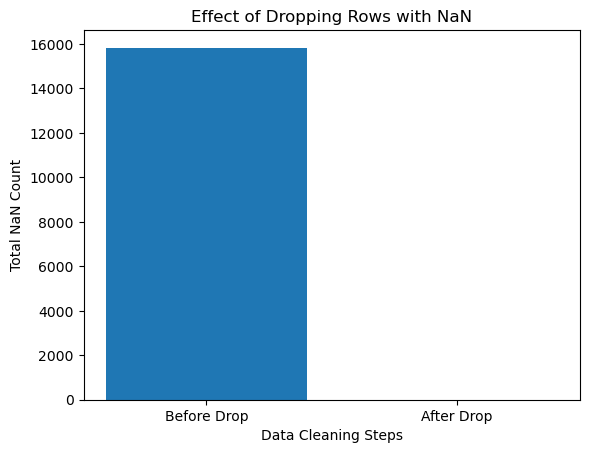

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


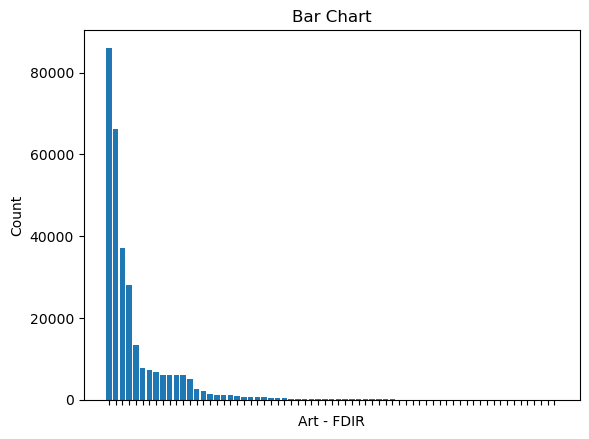

    Startposisjon bredde  Startposisjon lengde  Havdybde start  Varighet  \
1                 74.885                16.048          -335.0     295.0   
5                 74.910                15.868          -403.0     267.0   
11                74.883                16.056          -346.0     315.0   
17                74.931                15.785          -443.0     243.0   
19                67.828                12.972           -71.0      63.0   

    Stopposisjon bredde  Stopposisjon lengde  Havdybde stopp  Trekkavstand  \
1                74.914               15.969          -334.0        3970.0   
5                74.901               16.248          -277.0       11096.0   
11               74.924               15.742          -496.0       10215.0   
17               74.926               15.894          -358.0        3214.0   
19               67.827               12.942           -56.0        1269.0   

    Redskap FDIR (kode)  Hovedart FAO Art - FDIR  Rundvekt  Bredde  \
1   

In [2]:
# Import dataset preprocessing module
from preprocess import df  # Assuming 'preprocess.ipynb' contains preprocessing steps and loads the dataset into 'df'

# Display the first few rows of the dataframe to get an overview of the data
print(df.head())

In [3]:
# Selecting features and the target variable for the classification task
features = [
    'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month'
]
X = df[features]  # Input features
y = df['Hovedart FAO']  # Target variable for prediction

In [4]:
# Scaling the features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#legg til validation
# legg til 3 modeller med ulike paramtere
# pipeline
# normaliozation



# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6464601441200505
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      5103
           1       0.71      0.59      0.64      3693
           2       0.72      0.81      0.76      2674
           3       0.00      0.00      0.00      1497
           4       0.56      0.48      0.52       494

    accuracy                           0.65     13461
   macro avg       0.52      0.54      0.52     13461
weighted avg       0.58      0.65      0.61     13461



c:\Users\47476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


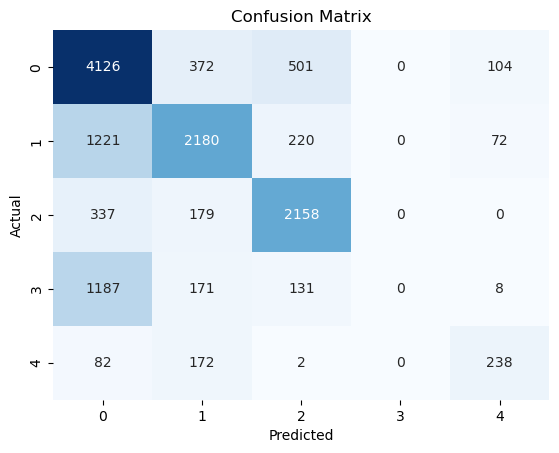

In [6]:
# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title for the heatmap
plt.show()

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters found: {'model__C': 100, 'model__solver': 'saga'}
Accuracy on test set: 0.6459401233192185
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      5103
           1       0.71      0.59      0.64      3693
           2       0.72      0.81      0.76      2674
           3       0.00      0.00      0.00      1497
           4       0.56      0.46      0.50       494

    accuracy                           0.65     13461
   macro avg       0.52      0.53      0.52     13461
weighted avg       0.58      0.65      0.61     13461



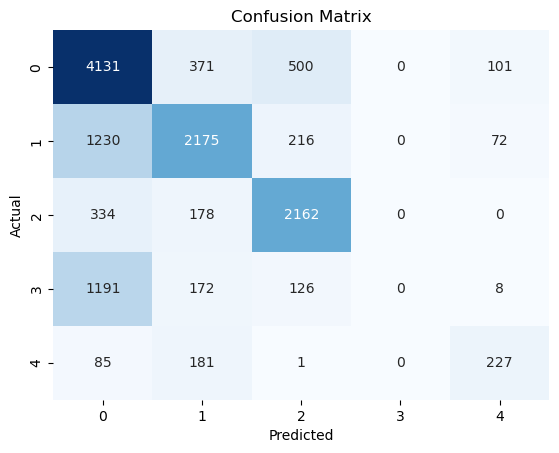

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Define a grid of parameters to search (if desired)
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']  # Example hyperparameters
}

# Setup grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid.fit(X_train, y_train)

# Making predictions
y_pred = grid.predict(X_test)

# Evaluate the model
print("Best parameters found:", grid.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For the logistic regression model employed in our analysis, parameter selection was guided by the following principles:

1. **Initial Simplicity**: Given logistic regression's efficiency and simplicity for binary and linearly separable classification tasks, the model was initiated with sklearn's default parameters. This approach facilitates establishing a robust baseline without immediately delving into extensive hyperparameter optimization.

2. **Solver and Regularization Choice**: By default, sklearn's `LogisticRegression` uses the 'lbfgs' solver, which is well-suited for small to medium-sized datasets. This solver automatically incorporates L2 regularization, a method that penalizes the square of coefficient magnitudes to mitigate overfitting by encouraging smaller, more generalized model coefficients.

#### Regularization Techniques

The use of regularization techniques is crucial in preventing overfitting, ensuring the model's generalizability to unseen data. Our logistic regression model utilizes L2 regularization by default, as detailed below:

- **L2 Regularization**: Integral to the 'lbfgs' solver, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of coefficients. This regularization form is known for its effectiveness in creating simpler models that generalize better to new data by discouraging large coefficients.

- **Adjusting Regularization Strength**: Although the model was initially configured with default regularization strength (`C=1.0`), the `C` parameter in `LogisticRegression` offers the flexibility to modify this strength inversely. Lower values of `C` increase the regularization effect, further reducing the risk of overfitting, especially in datasets with high dimensionality or when the model exhibits signs of overfitting.

### Conclusion

The logistic regression model's parameterization, rooted in simplicity and guided by the principles of effective regularization, lays a foundation for a solid baseline model. This approach underscores the balance between model complexity and the ability to generalize, with L2 regularization playing a pivotal role in model robustness. Future iterations of the model could explore hyperparameter tuning, including adjustments to the regularization strength (`C`), to refine performance and address specific characteristics of the dataset.
